In [1]:

import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import sklearn
# sns.set_style('white')
# import seaborn as sns
import time
from pickle import load


import math
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import iqr

In [2]:
k = 8
J = 32

# Load data #

In [3]:
truth_set_full = np.load("../../data/truth_run/f_20_all.npy")

In [4]:
truth_run_split = [i for i in np.array_split(truth_set_full,5,axis=0)]

In [5]:
poly_full = np.load("../../data/simulation_runs/polynomial_param/new_generated_data_20.npy")

In [6]:
poly_split = [i for i in np.array_split(poly_full,5,axis=0)]

In [7]:
rnn_full = np.load("../../data/simulation_runs/rnn/rnn_final/f_20_data/f_20_all.npy")

In [8]:
rnn_split = [i for i in np.array_split(rnn_full,5,axis=0)]

In [9]:
gan_full = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/new_generated_data_20.npy")

In [10]:
gan_split = [i for i in np.array_split(gan_full,5,axis=0)]

In [15]:
iqr_data = iqr(np.ravel(truth_set_full))
bin_width = (2 * iqr_data)/(np.ravel(truth_set_full).shape[0])**(1/3)

# Histogram of Xkt # 

In [13]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=4,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="L96-RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

In [16]:
number_bins = int((17--12)/bin_width)
number_bins

827

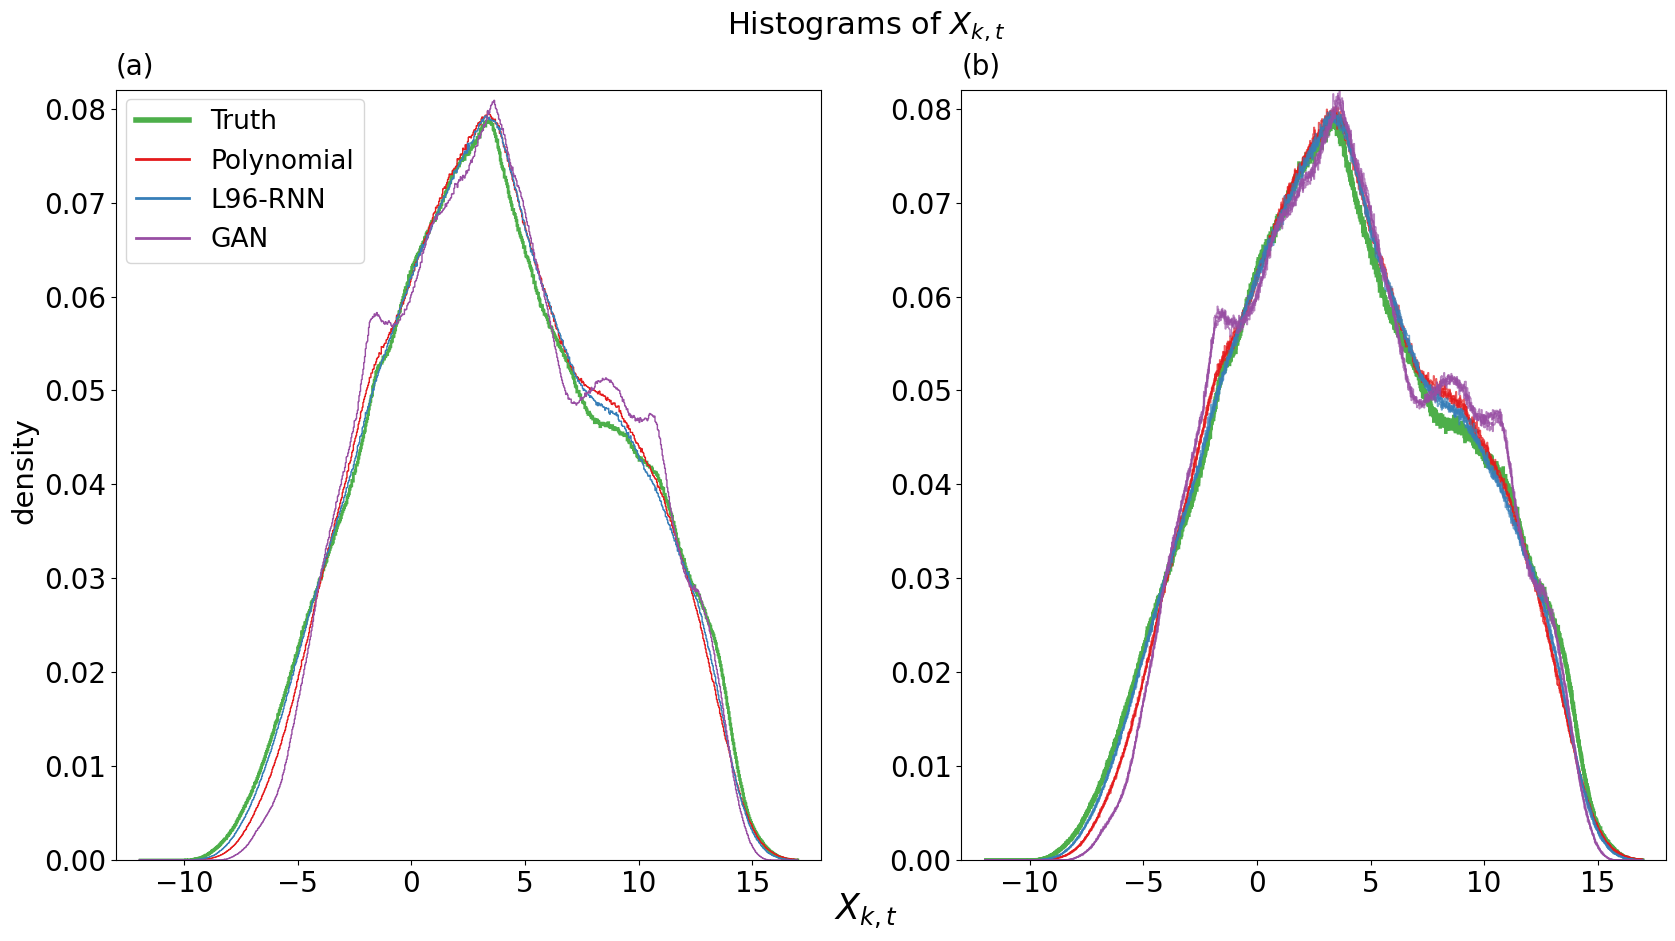

In [46]:
bin_seq = np.linspace(-12,17,number_bins)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

plt.rcParams['font.size'] = '20'

fig.suptitle("Histograms of $X_{k,t}$",fontsize=22,y=0.96)
ax[0].hist(x=np.ravel(truth_set_full[:,:]),color="#4daf4a",density=True,bins=bin_seq,histtype="step",linewidth=2) #train set truth
ax[0].hist(x=np.ravel(poly_full[:,:]),color="#e41a1c",density=True,bins=bin_seq,histtype="step") #train set truth
ax[0].hist(x=np.ravel(rnn_full[:,:]),color="#377eb8",density=True,bins=bin_seq,histtype="step") #train set truth
ax[0].hist(x=np.ravel(gan_full[:,:]),color="#984ea3",density=True,bins=bin_seq,histtype="step") #train set truth


for j in truth_run_split:
    ax[1].hist(x=np.ravel(j),color="#4daf4a",density=True,bins=bin_seq,histtype="step",linewidth=2) #train set truth
        
for i in poly_split:
    ax[1].hist(x=np.ravel(i),color="#e41a1c",density=True,bins=bin_seq,alpha=0.7,histtype="step") #poly set train
        
for i in rnn_split:
    ax[1].hist(x=np.ravel(i),color="#377eb8",density=True,bins=bin_seq,alpha=0.7,histtype="step") #rnn
        
for i in gan_split:
    ax[1].hist(x=np.ravel(i),color="#984ea3",density=True,bins=bin_seq,alpha=0.7,histtype="step") #gan
  
fig.legend(handles=legend_elements,loc=(0.075,0.72),prop={"size":19})
fig.text(0.5, 0.05, '$X_{k,t}$', ha='center',fontsize="25")
fig.text(0.072, 0.5, 'density', va='center', rotation='vertical',fontsize="21")


ax[0].text(-13,0.086,"(a)",fontsize=20,va="top")
ax[1].text(-13,0.086,"(b)",fontsize=20,va="top")

for i in range(2):
    ax[i].set_xlim([-13,18])
    ax[i].set_ylim([0,0.082])

plt.savefig("climate_eval_histograms.pdf",bbox_inches="tight")
plt.show()


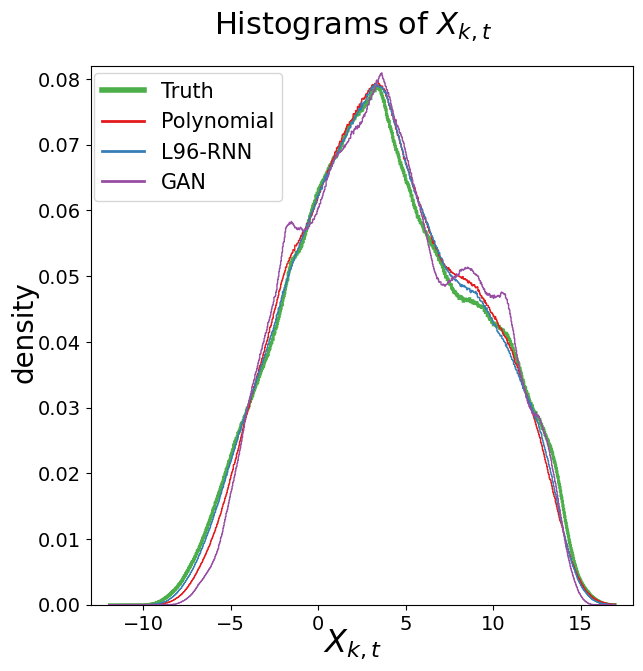

In [48]:
bin_seq = np.linspace(-12,17,number_bins)

fig, ax = plt.subplots(figsize=(7,7))

plt.rcParams['font.size'] = '14'

fig.suptitle("Histograms of $X_{k,t}$",fontsize=22,y=0.96)
ax.hist(x=np.ravel(truth_set_full[:,:]),color="#4daf4a",density=True,bins=bin_seq,histtype="step",linewidth=2) #train set truth
ax.hist(x=np.ravel(poly_full[:,:]),color="#e41a1c",density=True,bins=bin_seq,histtype="step") #train set truth
ax.hist(x=np.ravel(rnn_full[:,:]),color="#377eb8",density=True,bins=bin_seq,histtype="step") #train set truth
ax.hist(x=np.ravel(gan_full[:,:]),color="#984ea3",density=True,bins=bin_seq,histtype="step") #train set truth



fig.legend(handles=legend_elements,loc=(0.146,0.7),prop={"size":15})
fig.text(0.5, 0.043, '$X_{k,t}$', ha='center',fontsize="23")
fig.text(0.01, 0.5, 'density', va='center', rotation='vertical',fontsize="20")

ax.set_xlim([-13,18])
ax.set_ylim([0,0.082])

plt.savefig("climate_eval_histograms.pdf",bbox_inches="tight")
plt.show()


## KL Divergences ##

In [ ]:
bin_seq = np.linspace(-12,17,number_bins)


In [38]:
truth_density,_,_ = plt.hist(x=np.ravel(truth_set_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
gan_density,_,_ = plt.hist(x=np.ravel(gan_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
rnn_density,_,_ = plt.hist(x=np.ravel(rnn_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
poly_density,_,_ = plt.hist(x=np.ravel(poly_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth

plt.close()

In [39]:
truth_density = truth_density + 1e-10
gan_density = gan_density + 1e-10
rnn_density = rnn_density + 1e-10
poly_density = poly_density + 1e-10


In [40]:
#kl between poly and true
np.sum(np.log(truth_density/poly_density)*truth_density)


0.1287953320275298

In [41]:
#kl between rnn and true
np.sum(np.log(truth_density/rnn_density)*truth_density)


0.042950451485418026

In [42]:
#kl between gan and true
np.sum(np.log(truth_density/gan_density)*truth_density)


0.8319989089950874

In [44]:
for i in [600,700,800,900,1000]:
    print(i)
    
    bin_seq = np.linspace(-12,17,i)
    truth_density,_,_ = plt.hist(x=np.ravel(truth_set_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
    gan_density,_,_ = plt.hist(x=np.ravel(gan_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
    rnn_density,_,_ = plt.hist(x=np.ravel(rnn_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth
    poly_density,_,_ = plt.hist(x=np.ravel(poly_full[:,:]),color="grey",density=True,bins=bin_seq,histtype="step") #train set truth

    plt.close()
    
    truth_density = truth_density + 1e-10
    gan_density = gan_density + 1e-10
    rnn_density = rnn_density + 1e-10
    poly_density = poly_density + 1e-10

    print(np.sum(np.log(truth_density/poly_density)*truth_density)
)
    
    print(np.sum(np.log(truth_density/rnn_density)*truth_density)
)
    
    print(np.sum(np.log(truth_density/gan_density)*truth_density)
)

600
0.09332324575797751
0.03110147607665173
0.6034447741984363
700
0.10895288596755076
0.03632383887022746
0.7017158351473181
800
0.12458323468495575
0.04153844116870507
0.7968902813697417
900
0.14020637736010305
0.04679024149213132
0.9013058910861516
1000
0.1558559474484471
0.05202282845525209
1.0067989523004182
